In [77]:
API_KEY = "056q3ybm07H2jHCQGXmuIhE6pn18cK3JoTWW1fuQu0PRwRAr"

## Business Understanding

1. **Objectives**
- Building a machine learning-driven backtesting framework to test and validate alpha trading strategies to maximizes profit
- Maintain a Sharpe Ratio ≥ 1.8, Max Drawdown ≥ -40%, and trade frequency ≥ 3% per row
- Ensure execution strategies that simulate real-world conditions

2. **Goal**
- Discover a trading strategy that gives effective buy/sell signals to maximize returns
- Use on-chain data to predict future price movements
- Train and evaluate models like HMM, LSTM, and XGBoost to learn market patterns

3. **Idea**
- Why does the Bitcoin price often drop after miners move a large amount of Bitcoin out?

- Explanation of the Hypothesis:
- When miners move large amounts of Bitcoin out, it often means they are selling.
- Increased selling adds supply to the market, which can cause the price to fall.

4. **Hypothesis**
- If miner_outflow_total_y increases, then the Bitcoin price (close) is likely to drop

5. **Convert into Formula**
- corr(miner_outflow_total_y, close) < 0

- Explanation of the Formula:
- A negative correlation suggests that higher miner outflows are associated with lower Bitcoin prices.

# Data Understanding
1. Load and Preview Data
2. Check Data Types and Columns
3. Check for Missing Values
4. Check for Duplicates
5. Statistical Summary
6. Identify Outliers
7. Correlation Analysis


In [78]:
import os
import pandas as pd
import asyncio
import cybotrade_datasource
from datetime import datetime, timezone

# Function to fetch and save data
async def fetch_and_save_data(topic, filename):
    data = await cybotrade_datasource.query_paginated(
        api_key=API_KEY, 
        topic=topic, 
        start_time=datetime(year=2024, month=1, day=1, tzinfo=timezone.utc),
        end_time=datetime(year=2025, month=1, day=1, tzinfo=timezone.utc)
    )
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

# Main function to run all fetch operations
async def main():
    # Data 1: BTC Price OHLCV
    topic_ohlcv = 'cryptoquant|btc/market-data/price-ohlcv?window=hour&limit=2'
    await fetch_and_save_data(topic_ohlcv, 'btc_price_ohlcv.csv')

    # Data 2: BTC Open Interest
    topic_open_interest = 'cryptoquant|btc/market-data/open-interest?window=hour&exchange=bitmex'
    await fetch_and_save_data(topic_open_interest, 'btc_open_interest.csv')

    # Data 3: BTC Funding Rates
    topic_funding_rates = 'cryptoquant|btc/market-data/funding-rates?window=hour&exchange=bitmex'
    await fetch_and_save_data(topic_funding_rates, 'btc_funding_rates.csv')

    # Data 4: BTC Liquidations
    topic_liquidations = 'cryptoquant|btc/market-data/liquidations?window=hour&exchange=deribit'
    await fetch_and_save_data(topic_liquidations, 'btc_liquidations.csv')

    # Data 5: BTC Network Indicator NVT
    topic_nvt = 'cryptoquant|btc/network-indicator/nvt?window=day&limit=2'
    await fetch_and_save_data(topic_nvt, 'btc_network_indicator_nvt.csv')

    # Data 6: BTC Network Indicator Stock to Flow
    topic_stock_to_flow = 'cryptoquant|btc/network-indicator/stock-to-flow?window=hour&limit=2'
    await fetch_and_save_data(topic_stock_to_flow, 'btc_network_indicator_stock_to_flow.csv')

    # Data 7: BTC Network Net Unrealized Profit and Loss (NUPL)
    topic_nupl = 'cryptoquant|btc/network-indicator/nupl?window=day&limit=2'
    await fetch_and_save_data(topic_nupl, 'btc_network_indicator_nupl.csv')   

    # Data 8: BTC Network Indicator Puell Multiple
    topic_puell_multiple = 'cryptoquant|btc/network-indicator/puell-multiple?window=day&limit=2'
    await fetch_and_save_data(topic_puell_multiple, 'btc_network_indicator_puell_multiple.csv')

    # Data 9: BTC Network Indicator Dormancy
    topic_dormancy = 'cryptoquant|btc/network-indicator/dormancy?window=day&limit=2'
    await fetch_and_save_data(topic_dormancy, 'btc_network_indicator_dormancy.csv')

    # Data 10: BTC Exchange Flows Netflow
    topic_netflow = 'cryptoquant|btc/exchange-flows/netflow?exchange=binance&window=hour&limit=2'
    await fetch_and_save_data(topic_netflow, 'btc_exchange_flows_netflow.csv')

    # Data 11: BTC Exchange Flows Inflow
    topic_inflow = 'cryptoquant|btc/exchange-flows/inflow?exchange=binance&window=hour&limit=2'
    await fetch_and_save_data(topic_inflow, 'btc_exchange_flows_inflow.csv')

    # Data 12: BTC Exchange Flows Outflow
    topic_outflow = 'cryptoquant|btc/exchange-flows/outflow?exchange=binance&window=hour&limit=2'
    await fetch_and_save_data(topic_outflow, 'btc_exchange_flows_outflow.csv')

    # Data 13: BTC Exchange Flows Transactions Count
    topic_transactions_count = 'cryptoquant|btc/exchange-flows/transactions-count?exchange=binance&window=hour&limit=2'
    await fetch_and_save_data(topic_transactions_count, 'btc_exchange_flows_transactions_count.csv')

    # Data 14: BTC Miner Flows Netflow
    topic_miner_flows_netflow = 'cryptoquant|btc/miner-flows/netflow?miner=f2pool&window=hour&limit=2'
    await fetch_and_save_data(topic_miner_flows_netflow, 'btc_miner_flows_netflow.csv')

    # Data 15: BTC Miner Flows Inflow
    topic_miner_flows_inflow = 'cryptoquant|btc/miner-flows/inflow?miner=f2pool&window=hour&limit=2'
    await fetch_and_save_data(topic_miner_flows_inflow, 'btc_miner_flows_inflow.csv')

    # Data 16: BTC Miner Flows Outflow
    topic_miner_flows_outflow = 'cryptoquant|btc/miner-flows/outflow?miner=f2pool&window=hour&limit=2'
    await fetch_and_save_data(topic_miner_flows_outflow, 'btc_miner_flows_outflow.csv')

    # Data 17: BTC Exchange Whale Ratio
    topic_exchange_whale_ratio = 'cryptoquant|btc/flow-indicator/exchange-whale-ratio?exchange=binance&window=hour&limit=2'
    await fetch_and_save_data(topic_exchange_whale_ratio, 'btc_exchange_whale_ratio.csv')

    # Data 18: BTC Stablecoins Ratio
    topic_stablecoins_ratio = 'cryptoquant|btc/flow-indicator/stablecoins-ratio?exchange=binance&window=hour&limit=2'
    await fetch_and_save_data(topic_stablecoins_ratio, 'btc_stablecoins_ratio.csv')

# Run the main function
await main()


Data saved to btc_price_ohlcv.csv
Data saved to btc_open_interest.csv
Data saved to btc_funding_rates.csv
Data saved to btc_liquidations.csv
Data saved to btc_network_indicator_nvt.csv
Data saved to btc_network_indicator_stock_to_flow.csv
Data saved to btc_network_indicator_nupl.csv
Data saved to btc_network_indicator_puell_multiple.csv
Data saved to btc_network_indicator_dormancy.csv
Data saved to btc_exchange_flows_netflow.csv
Data saved to btc_exchange_flows_inflow.csv
Data saved to btc_exchange_flows_outflow.csv
Data saved to btc_exchange_flows_transactions_count.csv
Data saved to btc_miner_flows_netflow.csv
Data saved to btc_miner_flows_inflow.csv
Data saved to btc_miner_flows_outflow.csv
Data saved to btc_exchange_whale_ratio.csv
Data saved to btc_stablecoins_ratio.csv


# Convert Dormancy Dataset in datetime format

In [79]:
import pandas as pd
import numpy as np

# Read the original daily dataset
dormancy = pd.read_csv("btc_network_indicator_dormancy.csv") 

# Ensure the 'date' column is in datetime format
dormancy['date'] = pd.to_datetime(dormancy['date'])

# Prepare empty list to collect hourly rows
hourly_rows = []

for _, row in dormancy.iterrows():
    for hour in range(24):
        hour_datetime = row['date'] + pd.Timedelta(hours=hour)
        hour_start_time = int(hour_datetime.timestamp() * 1000)
        
        hourly_rows.append({
            'start_time': hour_start_time,
            'average_dormancy': row['average_dormancy'],
            'datetime': hour_datetime.strftime('%Y-%m-%d %H:%M:%S'),
            'sa_average_dormancy': row['sa_average_dormancy']
        })

# Convert to DataFrame
dormancy = pd.DataFrame(hourly_rows)

# Optional: sort by datetime
dormancy = dormancy.sort_values(by='datetime').reset_index(drop=True)

# Save to CSV
dormancy.to_csv("btc_network_indicator_dormancy.csv", index=False)

# Print sample
print(dormancy.head(30))


       start_time  average_dormancy             datetime  sa_average_dormancy
0   1704067200000          7.200357  2024-01-01 00:00:00         3.700000e-07
1   1704070800000          7.200357  2024-01-01 01:00:00         3.700000e-07
2   1704074400000          7.200357  2024-01-01 02:00:00         3.700000e-07
3   1704078000000          7.200357  2024-01-01 03:00:00         3.700000e-07
4   1704081600000          7.200357  2024-01-01 04:00:00         3.700000e-07
5   1704085200000          7.200357  2024-01-01 05:00:00         3.700000e-07
6   1704088800000          7.200357  2024-01-01 06:00:00         3.700000e-07
7   1704092400000          7.200357  2024-01-01 07:00:00         3.700000e-07
8   1704096000000          7.200357  2024-01-01 08:00:00         3.700000e-07
9   1704099600000          7.200357  2024-01-01 09:00:00         3.700000e-07
10  1704103200000          7.200357  2024-01-01 10:00:00         3.700000e-07
11  1704106800000          7.200357  2024-01-01 11:00:00        

# Convert Puell Multiple in Datetime format


In [80]:
import pandas as pd

# Load the dataset
puell = pd.read_csv("btc_network_indicator_puell_multiple.csv")

# Ensure 'date' is in datetime format
puell['date'] = pd.to_datetime(puell['date'])

# Prepare hourly records
hourly_rows = []

for _, row in puell.iterrows():
    for hour in range(24):
        hour_datetime = row['date'] + pd.Timedelta(hours=hour)
        hour_start_time = int(hour_datetime.timestamp() * 1000)
        
        hourly_rows.append({
            'start_time': hour_start_time,
            'datetime': hour_datetime.strftime('%Y-%m-%d %H:%M:%S'),
            'puell_multiple': row['puell_multiple']
        })

# Convert to DataFrame
puell = pd.DataFrame(hourly_rows)

# Optional: sort and reset index
puell = puell.sort_values(by='datetime').reset_index(drop=True)

# Save to CSV
puell.to_csv("btc_network_indicator_puell_multiple.csv", index=False)

# Preview
print(puell.head(30))


       start_time             datetime  puell_multiple
0   1704067200000  2024-01-01 00:00:00        1.764526
1   1704070800000  2024-01-01 01:00:00        1.764526
2   1704074400000  2024-01-01 02:00:00        1.764526
3   1704078000000  2024-01-01 03:00:00        1.764526
4   1704081600000  2024-01-01 04:00:00        1.764526
5   1704085200000  2024-01-01 05:00:00        1.764526
6   1704088800000  2024-01-01 06:00:00        1.764526
7   1704092400000  2024-01-01 07:00:00        1.764526
8   1704096000000  2024-01-01 08:00:00        1.764526
9   1704099600000  2024-01-01 09:00:00        1.764526
10  1704103200000  2024-01-01 10:00:00        1.764526
11  1704106800000  2024-01-01 11:00:00        1.764526
12  1704110400000  2024-01-01 12:00:00        1.764526
13  1704114000000  2024-01-01 13:00:00        1.764526
14  1704117600000  2024-01-01 14:00:00        1.764526
15  1704121200000  2024-01-01 15:00:00        1.764526
16  1704124800000  2024-01-01 16:00:00        1.764526
17  170412

# Convert NUPL Data to Datetime format

In [81]:
import pandas as pd

# Load the dataset
nupl = pd.read_csv("btc_network_indicator_nupl.csv")

# Convert the 'date' column to datetime
nupl['date'] = pd.to_datetime(nupl['date'])

# Create hourly records
hourly_rows = []

for _, row in nupl.iterrows():
    for hour in range(24):
        hour_datetime = row['date'] + pd.Timedelta(hours=hour)
        hour_start_time = int(hour_datetime.timestamp() * 1000)
        
        hourly_rows.append({
            'start_time': hour_start_time,
            'datetime': hour_datetime.strftime('%Y-%m-%d %H:%M:%S'),
            'nul': row['nul'],
            'nup': row['nup'],
            'nupl': row['nupl']
        })

# Convert to DataFrame
nupl = pd.DataFrame(hourly_rows)

# Sort by datetime
nupl = nupl.sort_values(by='datetime').reset_index(drop=True)

# Save to CSV
nupl.to_csv("btc_network_indicator_nupl.csv", index=False)

# Preview the result
print(nupl.head(30))


       start_time             datetime       nul       nup      nupl
0   1704067200000  2024-01-01 00:00:00  0.021235  0.522843  0.503474
1   1704070800000  2024-01-01 01:00:00  0.021235  0.522843  0.503474
2   1704074400000  2024-01-01 02:00:00  0.021235  0.522843  0.503474
3   1704078000000  2024-01-01 03:00:00  0.021235  0.522843  0.503474
4   1704081600000  2024-01-01 04:00:00  0.021235  0.522843  0.503474
5   1704085200000  2024-01-01 05:00:00  0.021235  0.522843  0.503474
6   1704088800000  2024-01-01 06:00:00  0.021235  0.522843  0.503474
7   1704092400000  2024-01-01 07:00:00  0.021235  0.522843  0.503474
8   1704096000000  2024-01-01 08:00:00  0.021235  0.522843  0.503474
9   1704099600000  2024-01-01 09:00:00  0.021235  0.522843  0.503474
10  1704103200000  2024-01-01 10:00:00  0.021235  0.522843  0.503474
11  1704106800000  2024-01-01 11:00:00  0.021235  0.522843  0.503474
12  1704110400000  2024-01-01 12:00:00  0.021235  0.522843  0.503474
13  1704114000000  2024-01-01 13:0

# Convert NVT to datetime format

In [82]:
import pandas as pd

# Load the dataset
nvt = pd.read_csv("btc_network_indicator_nvt.csv")

# Convert 'date' to datetime format
nvt['date'] = pd.to_datetime(nvt['date'])

# Create hourly entries
hourly_rows = []

for _, row in nvt.iterrows():
    for hour in range(24):
        hour_datetime = row['date'] + pd.Timedelta(hours=hour)
        hour_start_time = int(hour_datetime.timestamp() * 1000)

        hourly_rows.append({
            'start_time': hour_start_time,
            'datetime': hour_datetime.strftime('%Y-%m-%d %H:%M:%S'),
            'nvt': row['nvt']
        })

# Convert to DataFrame
nvt = pd.DataFrame(hourly_rows)

# Sort by datetime
nvt = nvt.sort_values(by='datetime').reset_index(drop=True)

# Save to CSV
nvt.to_csv("btc_network_indicator_nvt.csv", index=False)

# Optional preview
print(nvt.head(30))


       start_time             datetime        nvt
0   1704067200000  2024-01-01 00:00:00  38.103441
1   1704070800000  2024-01-01 01:00:00  38.103441
2   1704074400000  2024-01-01 02:00:00  38.103441
3   1704078000000  2024-01-01 03:00:00  38.103441
4   1704081600000  2024-01-01 04:00:00  38.103441
5   1704085200000  2024-01-01 05:00:00  38.103441
6   1704088800000  2024-01-01 06:00:00  38.103441
7   1704092400000  2024-01-01 07:00:00  38.103441
8   1704096000000  2024-01-01 08:00:00  38.103441
9   1704099600000  2024-01-01 09:00:00  38.103441
10  1704103200000  2024-01-01 10:00:00  38.103441
11  1704106800000  2024-01-01 11:00:00  38.103441
12  1704110400000  2024-01-01 12:00:00  38.103441
13  1704114000000  2024-01-01 13:00:00  38.103441
14  1704117600000  2024-01-01 14:00:00  38.103441
15  1704121200000  2024-01-01 15:00:00  38.103441
16  1704124800000  2024-01-01 16:00:00  38.103441
17  1704128400000  2024-01-01 17:00:00  38.103441
18  1704132000000  2024-01-01 18:00:00  38.103441


# Merging Market Data

In [83]:
# Load data
market_ohlcv = pd.read_csv('btc_price_ohlcv.csv')
market_interest = pd.read_csv('btc_open_interest.csv')
market_funding = pd.read_csv('btc_funding_rates.csv')
market_liquidations = pd.read_csv('btc_liquidations.csv')

# Merge datasets sequentially
market_combined = market_ohlcv.copy()

market_combined = pd.merge(
    market_combined,
    market_interest,
    on=['start_time', 'datetime'],
    how='left'
)

market_combined = pd.merge(
    market_combined,
    market_funding,
    on=['start_time', 'datetime'],
    how='left'
)

market_combined = pd.merge(
    market_combined,
    market_liquidations,
    on=['start_time', 'datetime'],
    how='left'
)

# Sort by time
market_combined = market_combined.sort_values('start_time')

# Reorder columns to put start_time and date first
column_order = ['start_time', 'datetime'] + [col for col in market_combined.columns if col not in ['start_time', 'datetime']]
market_combined = market_combined[column_order]

# Verify the combined data
print("Combined DataFrame Info:")
print(market_combined.info())
print("\nFirst 5 rows:")
print(market_combined.head())
print("\nMissing values:")
print(market_combined.isnull().sum())

# Save to new csv
market_combined.to_csv('combined_market.csv', index=False)

Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   start_time              8784 non-null   int64  
 1   datetime                8784 non-null   object 
 2   close                   8784 non-null   float64
 3   high                    8784 non-null   float64
 4   low                     8784 non-null   float64
 5   open                    8784 non-null   float64
 6   volume                  8784 non-null   float64
 7   open_interest           8784 non-null   int64  
 8   funding_rates           8777 non-null   float64
 9   long_liquidations       8782 non-null   float64
 10  long_liquidations_usd   8782 non-null   float64
 11  short_liquidations      8782 non-null   float64
 12  short_liquidations_usd  8782 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 892.3+ KB
None

Fi

# Merging Network Indicators Data

In [84]:
import pandas as pd

# Load all network indicator datasets
nvt = pd.read_csv('btc_network_indicator_nvt.csv')
stf = pd.read_csv('btc_network_indicator_stock_to_flow.csv')
nupl = pd.read_csv('btc_network_indicator_nupl.csv')
puell = pd.read_csv('btc_network_indicator_puell_multiple.csv')
dormancy = pd.read_csv('btc_network_indicator_dormancy.csv')

# Start with the first dataset as base
network_combined = nvt.copy()

# Merge sequentially with left join to preserve all time periods
network_combined = pd.merge(network_combined, stf, on=['start_time', 'datetime'], how='left')
network_combined = pd.merge(network_combined, nupl, on=['start_time', 'datetime'], how='left')
network_combined = pd.merge(network_combined, puell, on=['start_time', 'datetime'], how='left')
network_combined = pd.merge(network_combined, dormancy, on=['start_time', 'datetime'], how='left')

# Ensure start_time and date are first columns
column_order = ['start_time', 'datetime'] + [col for col in network_combined.columns if col not in ['start_time', 'datetime']]
network_combined = network_combined[column_order]

# Sort chronologically
network_combined = network_combined.sort_values('start_time')

# Verify the merge
print("Combined Network Indicators Info:")
print(network_combined.info())
print("\nFirst 5 rows:")
print(network_combined.head())
print("\nMissing values:")
print(network_combined.isnull().sum())

# Save to CSV
network_combined.to_csv('combined_network_indicators.csv', index=False)
print("\nSuccessfully saved combined network indicators to combined_network_indicators.csv")

Combined Network Indicators Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start_time               8784 non-null   int64  
 1   datetime                 8784 non-null   object 
 2   nvt                      8784 non-null   float64
 3   stock_to_flow            8761 non-null   float64
 4   stock_to_flow_reversion  8784 non-null   float64
 5   nul                      8784 non-null   float64
 6   nup                      8784 non-null   float64
 7   nupl                     8784 non-null   float64
 8   puell_multiple           8784 non-null   float64
 9   average_dormancy         8784 non-null   float64
 10  sa_average_dormancy      8784 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 755.0+ KB
None

First 5 rows:
      start_time             datetime        nvt  stock_to_flow  \
0  170

# Merging Miner Flows Data 

In [85]:
# Load data
miner_netflows = pd.read_csv('btc_miner_flows_netflow.csv')
miner_inflows = pd.read_csv('btc_miner_flows_inflow.csv')
miner_outflows = pd.read_csv('btc_miner_flows_outflow.csv')

# Merge datasets sequentially
# Start with netflows as base
miner_combined = miner_netflows.copy()

# Merge inflows
miner_combined = pd.merge(
    miner_combined,
    miner_inflows,
    on=['start_time', 'datetime'],
    how='left'  # Use left join to keep all netflow records
)

miner_combined = pd.merge(
    miner_combined,
    miner_outflows,
    on=['start_time', 'datetime'],
    how='left'
)

# Sort by time
miner_combined = miner_combined.sort_values('start_time')

# Verify the combined data
print("Combined DataFrame Info:")
print(miner_combined.info())
print("\nFirst 5 rows:")
print(miner_combined.head())
print("\nMissing values:")
print(miner_combined.isnull().sum())

# Save to new csv
miner_combined.to_csv('combined_miner_flows.csv', index=False)

Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   start_time        8784 non-null   int64  
 1   datetime          8784 non-null   object 
 2   netflow_total     8784 non-null   float64
 3   inflow_mean       8784 non-null   float64
 4   inflow_mean_ma7   8784 non-null   float64
 5   inflow_top10      8784 non-null   float64
 6   inflow_total      8784 non-null   float64
 7   outflow_mean      8784 non-null   float64
 8   outflow_mean_ma7  8784 non-null   float64
 9   outflow_top10     8784 non-null   float64
 10  outflow_total     8784 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 755.0+ KB
None

First 5 rows:
      start_time             datetime  netflow_total  inflow_mean  \
0  1704067200000  2024-01-01 00:00:00       2.934309     0.032911   
1  1704070800000  2024-01-01 01:00:

# Merging Exchange Flows Data

In [86]:
# Load data
exchange_netflows = pd.read_csv('btc_exchange_flows_netflow.csv')
exchange_inflows = pd.read_csv('btc_exchange_flows_inflow.csv')
exchange_outflow = pd.read_csv('btc_exchange_flows_outflow.csv')
exchange_transaction_count = pd.read_csv('btc_exchange_flows_transactions_count.csv')

# Merge datasets sequentially
# Start with netflows as base
exchange_combined = exchange_netflows.copy()

# Merge inflows
exchange_combined = pd.merge(
    exchange_combined,
    exchange_inflows,
    on=['start_time', 'datetime'],
    how='left'  # Use left join to keep all netflow records
)

exchange_combined = pd.merge(
    exchange_combined,
    exchange_outflow,
    on=['start_time', 'datetime'],
    how='left'
)

exchange_combined = pd.merge(
    exchange_combined, exchange_transaction_count,
    on=['start_time', 'datetime'],
    how='left'
)

# Sort by time
exchange_combined = exchange_combined.sort_values('start_time')

# Verify the combined data
print("Combined DataFrame Info:")
print(exchange_combined.info())
print("\nFirst 5 rows:")
print(exchange_combined.head())
print("\nMissing values:")
print(exchange_combined.isnull().sum())

# Save to new csv
exchange_combined.to_csv('combined_exchange_flows.csv', index=False)


Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   start_time                  8784 non-null   int64  
 1   datetime                    8784 non-null   object 
 2   netflow_total               8784 non-null   float64
 3   inflow_mean                 8784 non-null   float64
 4   inflow_mean_ma7             8784 non-null   float64
 5   inflow_top10                8784 non-null   float64
 6   inflow_total                8784 non-null   float64
 7   outflow_mean                8784 non-null   float64
 8   outflow_mean_ma7            8784 non-null   float64
 9   outflow_top10               8784 non-null   float64
 10  outflow_total               8784 non-null   float64
 11  transactions_count_inflow   8784 non-null   int64  
 12  transactions_count_outflow  8784 non-null   int64  
dtypes: float

# Combine datasets into one dataset

In [87]:
import pandas as pd

# Load all combined datasets
exchange_flows_whale_ratio = pd.read_csv('btc_exchange_whale_ratio.csv')
exchange_flows = pd.read_csv('combined_exchange_flows.csv')
miner_flows = pd.read_csv('combined_miner_flows.csv')
network_indicators = pd.read_csv('combined_network_indicators.csv')
market_data = pd.read_csv('combined_market.csv')

# Start with the largest dataset as base
final_combined = market_data.copy()

# List of datasets to merge (excluding market_data which is our base)
datasets_to_merge = [
    ('Flow Indicators', exchange_flows_whale_ratio),
    ('Exchange Flows', exchange_flows),
    ('Miner Flows', miner_flows),
    ('Network Indicators', network_indicators)
]

# Merge all datasets sequentially
for name, df in datasets_to_merge:
    print(f"Merging {name} dataset...")
    final_combined = pd.merge(
        final_combined,
        df,
        on=['start_time', 'datetime'],
        how='left',  # Preserves all market data records
        validate='one_to_one'  # Ensures no duplicate time periods
    )

# Ensure start_time and date are first columns
column_order = ['start_time', 'datetime'] + [col for col in final_combined.columns if col not in ['start_time', 'datetime']]
final_combined = final_combined[column_order]

# Sort chronologically
final_combined = final_combined.sort_values('start_time')

# Data quality checks
print("\nFinal Combined Dataset Info:")
print(final_combined.info())
print("\nMissing Value Counts:")
print(final_combined.isnull().sum().sort_values(ascending=False))
print("\nDuplicate Time Check:")
print(f"Duplicate start_times: {final_combined.duplicated('start_time').sum()}")
print(f"Duplicate datetimes: {final_combined.duplicated('datetime').sum()}")

# Save final dataset
final_combined.to_csv('final_combined_dataset.csv', index=False)
print("\nSuccessfully saved final combined dataset to final_combined_dataset.csv")

Merging Flow Indicators dataset...
Merging Exchange Flows dataset...
Merging Miner Flows dataset...
Merging Network Indicators dataset...

Final Combined Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   start_time                  8784 non-null   int64  
 1   datetime                    8784 non-null   object 
 2   close                       8784 non-null   float64
 3   high                        8784 non-null   float64
 4   low                         8784 non-null   float64
 5   open                        8784 non-null   float64
 6   volume                      8784 non-null   float64
 7   open_interest               8784 non-null   int64  
 8   funding_rates               8777 non-null   float64
 9   long_liquidations           8782 non-null   float64
 10  long_liquidations_usd       8782 non

# Hidden Markov Model

In [88]:
import pandas as pd
import numpy as np
from hmmlearn import hmm 
from hmmlearn.hmm import GaussianHMM
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("final_combined_dataset.csv")
df['datetime'] = pd.to_datetime(df['datetime'])

# Top signal-rich features
selected_features = [
    'funding_rates',
    'exchange_whale_ratio',
    'open_interest',
    'netflow_total_x',
    'inflow_top10_x',
    'outflow_top10_x',
    'nvt',
    'puell_multiple'
]

obs = df[selected_features].copy()

# Clean and align
obs.replace([np.inf, -np.inf], np.nan, inplace=True)
obs.dropna(inplace=True)

df = df.loc[obs.index].reset_index(drop=True)
obs.reset_index(drop=True, inplace=True)

# Scale
scaler = StandardScaler()
normalized_scaled = scaler.fit_transform(obs)

In [89]:
# Train-Test Split (80% - 20%)
T_total = len(normalized_scaled)
train_size = int(T_total * 0.8)
test_size = T_total - train_size

train_data = normalized_scaled[:train_size]
test_data = normalized_scaled[train_size:]

print(f"Training samples: {train_data.shape[0]}, Testing samples: {test_data.shape[0]}")

Training samples: 7021, Testing samples: 1756


Components: 2 | AIC: 87037.03 | BIC: 87277.01 | Log Likelihood: -43483.51
Components: 3 | AIC: 76917.21 | BIC: 77301.18 | Log Likelihood: -38402.60
Components: 4 | AIC: 68068.28 | BIC: 68609.96 | Log Likelihood: -33955.14
Components: 5 | AIC: 38743.24 | BIC: 39456.33 | Log Likelihood: -19267.62


Model is not converging.  Current: -27745.464943288553 is not greater than -27745.450666197474. Delta is -0.014277091078838566


Components: 6 | AIC: 55753.05 | BIC: 56651.27 | Log Likelihood: -27745.53


Model is not converging.  Current: -20649.57603258735 is not greater than -20649.48962649426. Delta is -0.08640609308713465


Components: 7 | AIC: 41619.43 | BIC: 42716.50 | Log Likelihood: -20649.72


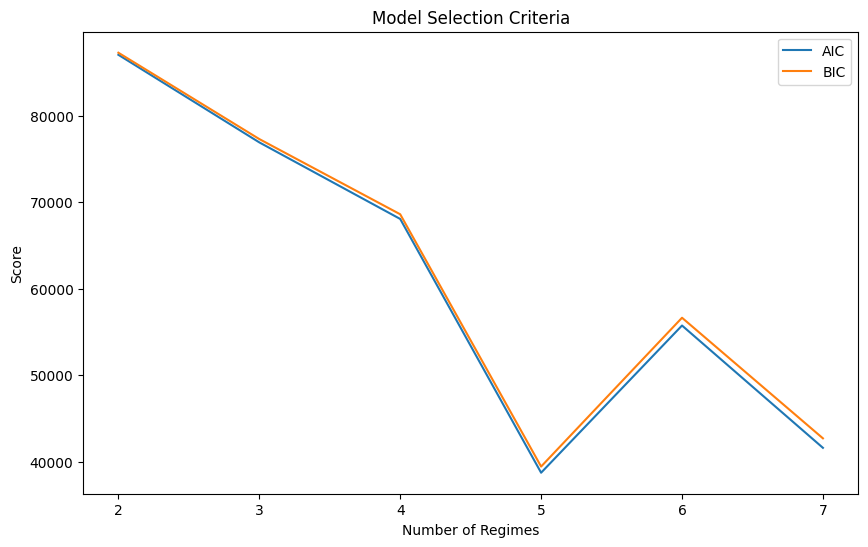

In [90]:

aic_values = []
bic_values = []
log_likelihoods = []
models = []
n_components_range = range(2, 8)  # Trying 2 to 7 regimes


for n in n_components_range:
    model = GaussianHMM(n_components=n, covariance_type="full", n_iter=1000, random_state=42)
    model.fit(train_data)
    
    log_likelihood = model.score(train_data)

    n_params = n**2 + n*train_data.shape[1]*2 - 1

    # AIC and BIC
    aic = -2 * log_likelihood + 2 * n_params
    bic = -2 * log_likelihood + np.log(len(train_data)) * n_params

    # Store results
    models.append(model)
    aic_values.append(aic)
    bic_values.append(bic)
    log_likelihoods.append(log_likelihood)

    print(f"Components: {n} | AIC: {aic:.2f} | BIC: {bic:.2f} | Log Likelihood: {log_likelihood:.2f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic_values, label = 'AIC')
plt.plot(n_components_range, bic_values, label = 'BIC')
plt.xlabel('Number of Regimes')
plt.ylabel('Score')
plt.title('Model Selection Criteria')
plt.legend()
plt.show()

# The lower the models AIC or BIC, the better the model



In [91]:

# Based on the AIC/BIC values, Regimes 5 appear the lowest
# n_components: Number of hidden states (market regimes)
# Convariance_type: Allow model to learn full covariance structure of features
# n_iter: Number of iterations for convergence

best_n_components = 4

# Create and fit HMM 
model = hmm.GaussianHMM(n_components=best_n_components, covariance_type="full", n_iter=1000, random_state=42, verbose=True)
model.fit(train_data) 

# Predict
df['hmm_state'] = model.predict(normalized_scaled)

# Predict soft regime probabilities
regime_probs = model.predict_proba(normalized_scaled)

# Add regime probabilities directly
for i in range(best_n_components):
    df[f'regime_prob_{i}'] = regime_probs[:, i]

         1  -64499.49967831             +nan
         2  -48581.09183382  +15918.40784449
         3  -43335.81588384   +5245.27594998
         4  -41096.65560755   +2239.16027629
         5  -39725.08812999   +1371.56747756
         6  -38797.93589325    +927.15223674
         7  -37838.83389146    +959.10200179
         8  -36758.83177100   +1080.00212046
         9  -35529.16233695   +1229.66943405
        10  -35193.45047831    +335.71185864
        11  -35084.48499787    +108.96548043
        12  -34983.13044792    +101.35454995
        13  -34889.63803953     +93.49240840
        14  -34795.62338261     +94.01465691
        15  -34697.18976756     +98.43361505
        16  -34589.01330527    +108.17646229
        17  -34472.07438913    +116.93891615
        18  -34361.60427977    +110.47010936
        19  -34277.08253298     +84.52174679
        20  -34218.40856969     +58.67396329
        21  -34175.71266916     +42.69590053
        22  -34141.93293232     +33.77973684
        23

In [92]:
for i in range(best_n_components):
    regime_data = obs[df['hmm_state'] == i]
    print(f"\n--- Regime {i} Summary ---")
    print(regime_data.describe())


--- Regime 0 Summary ---
       funding_rates  exchange_whale_ratio  open_interest  netflow_total_x  \
count    3385.000000           3385.000000   3.385000e+03      3385.000000   
mean        0.006145              0.987169   2.873466e+08        44.857872   
std         0.007673              0.013802   4.059579e+07       299.929578   
min        -0.024800              0.920282   2.148345e+08      -834.294456   
25%         0.003100              0.981397   2.571429e+08      -143.231948   
50%         0.010000              0.992471   2.840074e+08       -13.550632   
75%         0.010000              0.997300   3.096318e+08       217.289438   
max         0.045700              1.000000   4.760768e+08      1697.488204   

       inflow_top10_x  outflow_top10_x          nvt  puell_multiple  
count     3385.000000      3385.000000  3385.000000     3385.000000  
mean       269.025394       215.022838    31.954411        0.780552  
std        277.527987       149.041647    10.884140        0.

# Visualise Regime Over Time

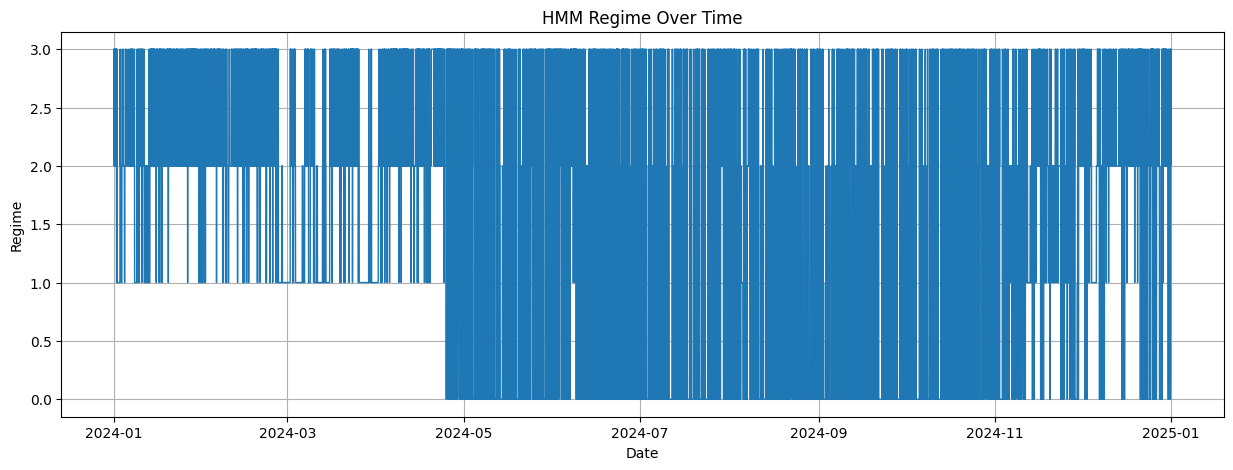

In [93]:
plt.figure(figsize=(15,5))
plt.plot(df['datetime'], df['hmm_state'], lw=1)
plt.title('HMM Regime Over Time')
plt.xlabel('Date')
plt.ylabel('Regime')
plt.grid(True)
plt.show()


# Check Regime Transition

In [94]:
print("Transition Matrix:\n", model.transmat_)

Transition Matrix:
 [[0.74598541 0.00694923 0.09024666 0.1568187 ]
 [0.01652441 0.81044683 0.12169234 0.05133642]
 [0.12604834 0.03308965 0.5760193  0.26484271]
 [0.32203493 0.03152239 0.50403162 0.14241107]]


# Overlaid with price

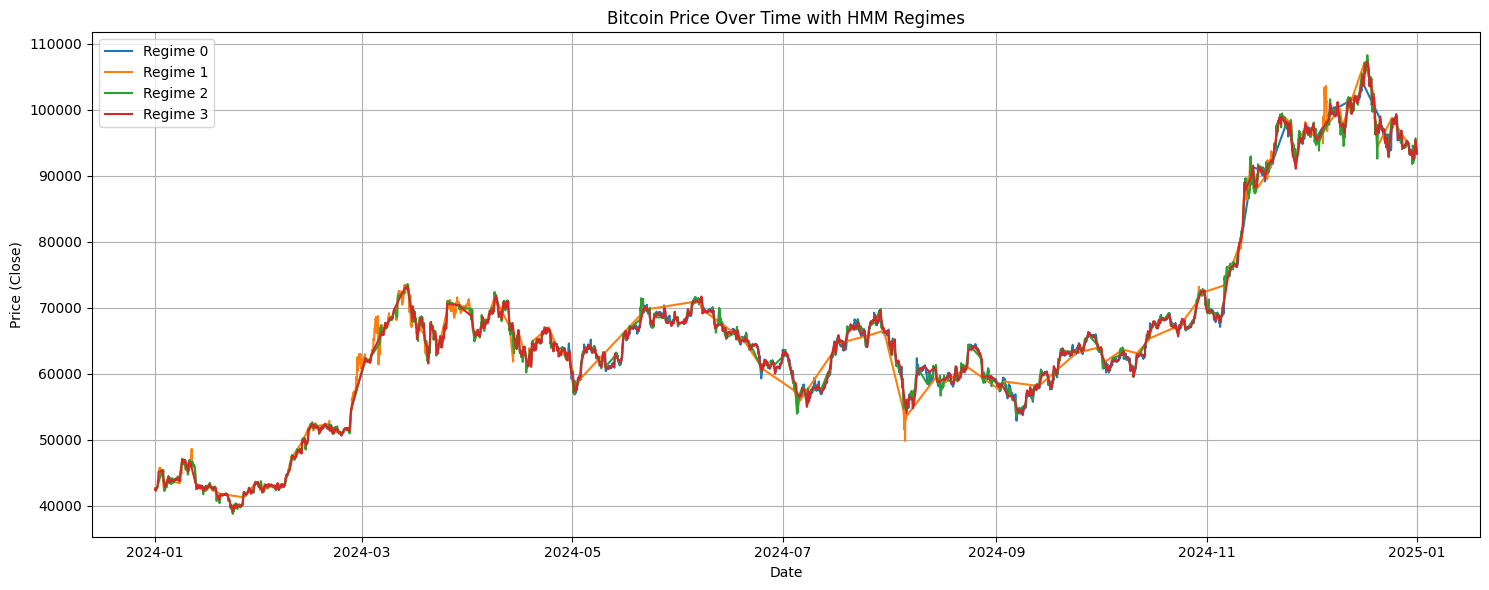

In [95]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'datetime' is datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Plot price with colored regime overlays
plt.figure(figsize=(15, 6))

for state in range(best_n_components):
    mask = df['hmm_state'] == state
    plt.plot(df['datetime'][mask], df['close'][mask], label=f'Regime {state}', linewidth=1.5)

plt.title('Bitcoin Price Over Time with HMM Regimes')
plt.xlabel('Date')
plt.ylabel('Price (Close)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The above graph is Bitcoin’s closing price over time, with different colors representing different HMM (Hidden Markov Model) regimes, aka “market states” or “regimes.” Each line segment represents the portion of the price series when the HMM model believes the market was in that state.

- If Regime 0 appears mostly during rising markets, it could represent a bullish trend.
- If Regime 3 often appears in sharp drops, it may indicate panic or crash conditions.
- If Regime 4 dominates sideways movement, it might reflect a consolidation phase.

In [96]:
df['return'] = df['close'].pct_change()

# Group by regime
regime_stats = df.groupby('hmm_state')['return'].agg(['mean', 'std', 'count'])
print(regime_stats)


               mean       std  count
hmm_state                           
0          0.000009  0.004528   3385
1          0.000100  0.008343    868
2          0.000158  0.006201   3021
3          0.000223  0.004737   1502


Key Take Aways:

Regime 3 = Best performing regime, it may be useful for entry signals in strategy testing.

Regime 2 = Most volatile and least rewarding, we will avoid trading or use for risk-off signals.

Regime 1 & 0 = Calm periods, it is good for mean-reverting strategies.

Regime 4 = Might be sideways chop or short-term distribution/accumulation.

In [97]:
df.to_csv("hmm_augmented_dataset.csv", index=False)

# LSTM

In [188]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import matplotlib.pyplot as plt

# === Load data ===
df = pd.read_csv("hmm_augmented_dataset.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# === Drop unnecessary columns ===
if 'start_time' in df.columns:
    df = df.drop(columns=['start_time'])

df = df.dropna()  # Drop any rows with missing values

# === Select features ===
target_col = 'close'
feature_cols = df.columns[df.columns != target_col]  # All except close
full_cols = list(feature_cols) + [target_col]

# === Scale ===
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[full_cols])

# === Create sequences ===
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, :-1])  # features only
    y.append(scaled_data[i, -1])                     # target (close)

X, y = np.array(X), np.array(y)

# === Train-test split ===
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [209]:
# === Model ===
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')



# Model Training

In [210]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 36s 141ms/step - loss: 0.0109 - val_loss: 0.0214
Epoch 2/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 27s 123ms/step - loss: 0.0011 - val_loss: 0.0159
Epoch 3/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 46s 211ms/step - loss: 8.5464e-04 - val_loss: 0.0196
Epoch 4/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 46s 210ms/step - loss: 7.0668e-04 - val_loss: 0.0160
Epoch 5/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 44s 200ms/step - loss: 6.4942e-04 - val_loss: 0.0206
Epoch 6/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 47s 217ms/step - loss: 5.4326e-04 - val_loss: 0.0146
Epoch 7/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 56s 255ms/step - loss: 5.0013e-04 - val_loss: 0.0160
Epoch 8/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 34s 157ms/step - loss: 4.0561e-04 - val_loss: 0.0150
Epoch 9/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 38s 174ms/step - loss: 4.0567e-04 - val_loss: 0.0156
Epoch 10/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 37s 170ms/step - loss: 3.5789e-04 - val_loss: 0.0189
Epoch 11/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 37s 170ms/step - loss: 3.0248e-04 - 

# Predict

In [211]:
# Make predictions
predicted_scaled = model.predict(X_test)


55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step


# Inverse Transform

In [212]:
# Padding to match the size of the feature columns
padding = np.zeros((len(y_test), len(feature_cols)))  # all features = 0

# Create full arrays by stacking the predictions and actual values
y_test_full = np.hstack((padding, y_test.reshape(-1, 1)))  # Append y_test (true values)
predicted_full = np.hstack((padding, predicted_scaled))  # Append predicted values


y_test_inverse = scaler.inverse_transform(y_test_full)[:, -1]  # Inverse transform actual values
predicted_inverse = scaler.inverse_transform(predicted_full)[:, -1]  # Inverse transform predicted values


# Plot Result

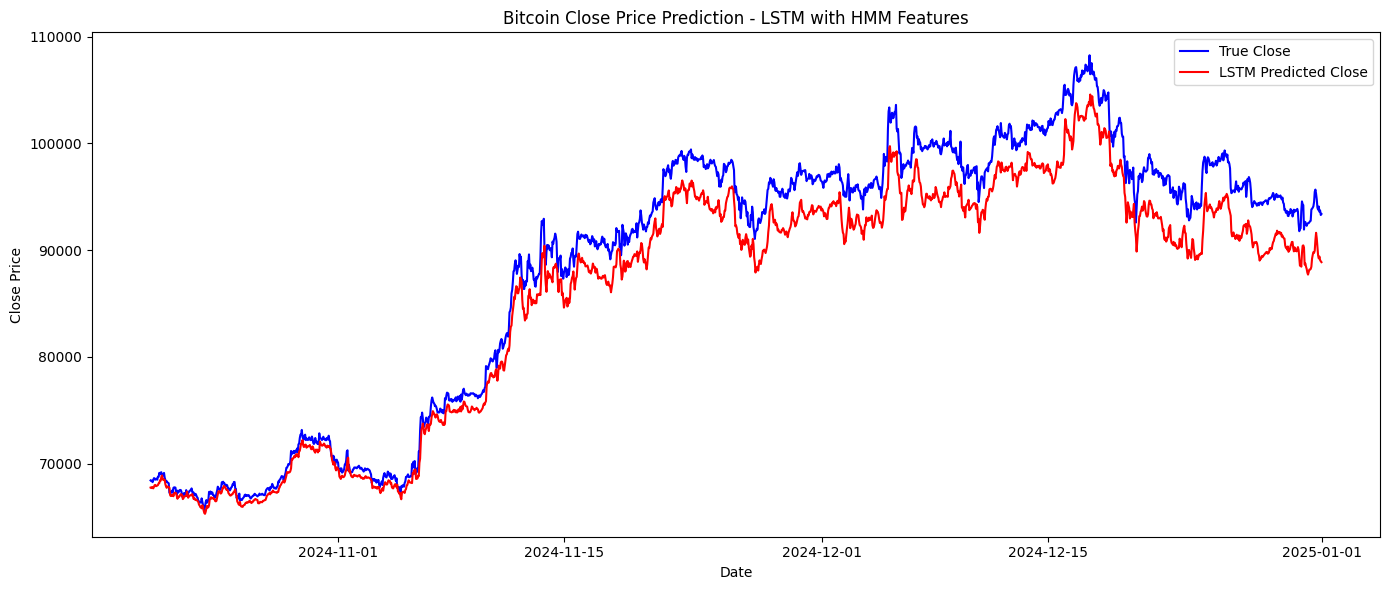

In [213]:
# Plot the actual vs predicted close prices
plt.figure(figsize=(14, 6))
plt.plot(df.index[-len(y_test):], y_test_inverse, label='True Close', color='blue')
plt.plot(df.index[-len(y_test):], predicted_inverse, label='LSTM Predicted Close', color='red')
plt.title("Bitcoin Close Price Prediction - LSTM with HMM Features")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()



In [214]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test_inverse, predicted_inverse))
mae = mean_absolute_error(y_test_inverse, predicted_inverse)
r2 = r2_score(y_test_inverse, predicted_inverse)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")


RMSE: 3031.4899387462265
MAE: 2635.732064845243
R²: 0.94150071838344


Observe Validation Prediction Performance

In [227]:
# === Create comparison DataFrame ===
comparison_df = pd.DataFrame({
    "Actual_Close_Price": y_test_inverse,
    "Predicted_Close_Price": predicted_inverse
}, index=df.index[-len(y_test_inverse):])  # last portion of original datetime index


In [244]:
comparison_df.head()

,Actual_Close_Price,Predicted_Close_Price,Signal,Log_Actual_Close,Log_Predicted_Close
datetime,,,,,
2024-10-20 09:00:00,68424.228465,67756.435896,-1,11.133482,11.123675
2024-10-20 10:00:00,68358.281644,67777.107954,-1,11.132518,11.123980
2024-10-20 11:00:00,68415.162119,67707.885559,-1,11.133350,11.122958
2024-10-20 12:00:00,68262.580198,67795.922012,-1,11.131117,11.124257
2024-10-20 13:00:00,68455.924667,67682.948594,-1,11.133945,11.122590


Visualize predicted code price vs close price with buy and sell signal

In [245]:
comparison_df['Signal'] = 0  # default: hold/no action
comparison_df.loc[comparison_df['Predicted_Close_Price'] > comparison_df['Actual_Close_Price'], 'Signal'] = 1
comparison_df.loc[comparison_df['Predicted_Close_Price'] < comparison_df['Actual_Close_Price'], 'Signal'] = -1


buy_signals = comparison_df[comparison_df['Signal'] == 1]
sell_signals = comparison_df[comparison_df['Signal'] == -1]


print(comparison_df[['Actual_Close_Price', 'Predicted_Close_Price', 'Signal']].head())

print("Is any predicted price > actual?", (comparison_df['Predicted_Close_Price'] > comparison_df['Actual_Close_Price']).any())


# Compare predicted price at time T vs actual price at T+1
comparison_df['Signal'] = np.where(
    comparison_df['Predicted_Close_Price'] > comparison_df['Actual_Close_Price'].shift(-1),
    1,  # Buy
    -1  # Sell
)

buy_signals = comparison_df[comparison_df['Signal'] == 1]
sell_signals = comparison_df[comparison_df['Signal'] == -1]

# Now check if buy signals exist:
print("Buy signals exist:", len(buy_signals) > 0)

                     Actual_Close_Price  Predicted_Close_Price  Signal
datetime                                                              
2024-10-20 09:00:00        68424.228465           67756.435896      -1
2024-10-20 10:00:00        68358.281644           67777.107954      -1
2024-10-20 11:00:00        68415.162119           67707.885559      -1
2024-10-20 12:00:00        68262.580198           67795.922012      -1
2024-10-20 13:00:00        68455.924667           67682.948594      -1
Is any predicted price > actual? True
Buy signals exist: True


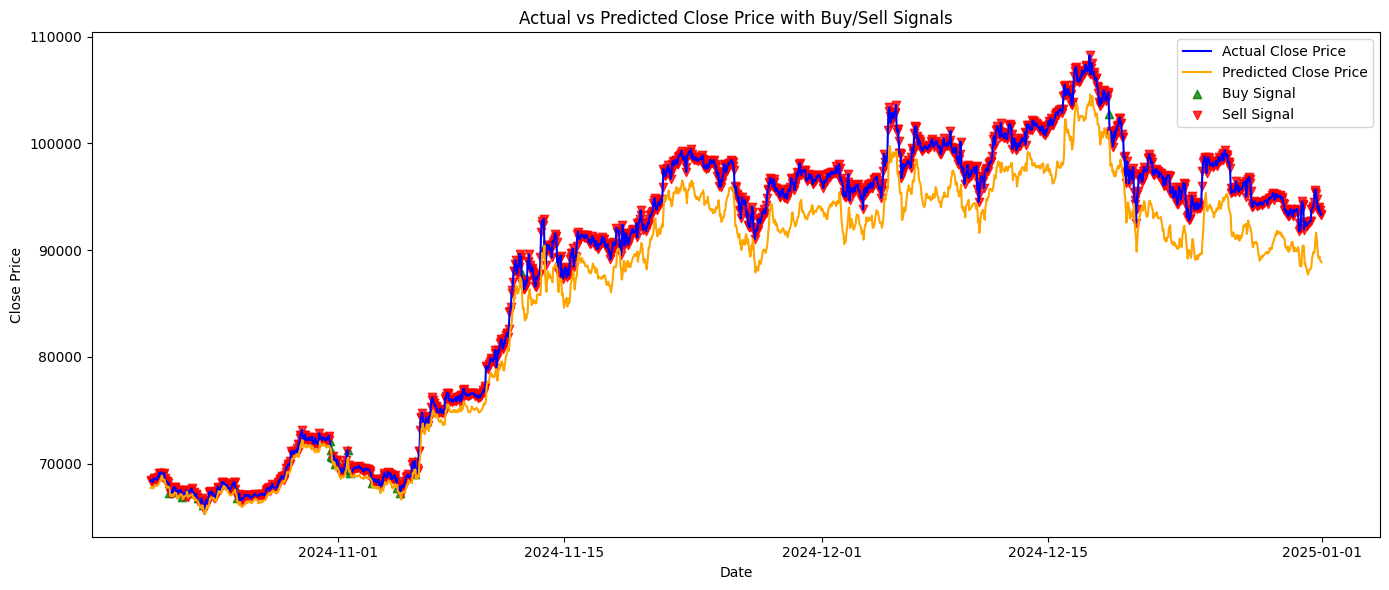

In [246]:
plt.figure(figsize=(14, 6))
plt.plot(comparison_df.index, comparison_df['Actual_Close_Price'], label='Actual Close Price', color='blue')
plt.plot(comparison_df.index, comparison_df['Predicted_Close_Price'], label='Predicted Close Price', color='orange')

# Buy signals (Green ↑)
plt.scatter(buy_signals.index, buy_signals['Actual_Close_Price'], marker='^', color='green', label='Buy Signal', alpha=0.8)

# Sell signals (Red ↓)
plt.scatter(sell_signals.index, sell_signals['Actual_Close_Price'], marker='v', color='red', label='Sell Signal', alpha=0.8)

plt.title("Actual vs Predicted Close Price with Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()


Back Testing 

In [247]:
signals = []
for i in range(1, len(predicted_inverse)):
    if predicted_inverse[i] > predicted_inverse[i - 1]:
        signals.append(1)   # Buy
    elif predicted_inverse[i] < predicted_inverse[i - 1]:
        signals.append(-1)  # Sell
    else:
        signals.append(0)   # Hold

signals.insert(0, 0)  # to match the length
signals = np.array(signals)

In [248]:
initial_balance = 100000
balance = initial_balance
btc_holding = 0
fee_rate = 0.0006
portfolio_value = []

for i in range(len(signals)):
    price = y_test_inverse[i]
    
    if signals[i] == 1 and btc_holding == 0:
        btc_holding = (balance * (1 - fee_rate)) / price
        balance = 0

    elif signals[i] == -1 and btc_holding > 0:
        balance = btc_holding * price * (1 - fee_rate)
        btc_holding = 0

    # Store current total portfolio value
    current_value = balance if btc_holding == 0 else btc_holding * price
    portfolio_value.append(current_value)


import pandas as pd

# Convert to series
portfolio_series = pd.Series(portfolio_value)

# --- Sharpe Ratio ---
daily_returns = portfolio_series.pct_change().dropna()
sharpe_ratio = daily_returns.mean() / daily_returns.std() * np.sqrt(252)

# --- Max Drawdown ---
rolling_max = portfolio_series.cummax()
drawdown = (portfolio_series - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# --- Trade Frequency ---
num_trades = np.sum(np.abs(np.diff(signals)) > 0)
trade_frequency = num_trades / len(signals)

print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")
print(f"Trade Frequency: {trade_frequency:.2%}")

Sharpe Ratio: 0.95
Max Drawdown: -8.80%
Trade Frequency: 14.03%
